In [1]:
# !gdown 1FSFlGxuhd5IYsgZfL6YErgAr3_ZJv0ry

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import ttest_1samp,ttest_ind,chi2_contingency,levene,spearmanr,pearsonr,ttest_rel

In [3]:
df = pd.read_csv("Delhivery.csv")

In [4]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [5]:
df.shape

(144867, 24)

In [6]:
df[df["trip_uuid"]=="trip-153741093647649320"][["trip_uuid","source_center","destination_center","actual_time","segment_actual_time"]]

,trip_uuid,source_center,destination_center,actual_time,segment_actual_time
0,trip-153741093647649320,IND388121AAA,IND388620AAB,14.0,14.0
1,trip-153741093647649320,IND388121AAA,IND388620AAB,24.0,10.0
2,trip-153741093647649320,IND388121AAA,IND388620AAB,40.0,16.0
3,trip-153741093647649320,IND388121AAA,IND388620AAB,62.0,21.0
4,trip-153741093647649320,IND388121AAA,IND388620AAB,68.0,6.0
5,trip-153741093647649320,IND388620AAB,IND388320AAA,15.0,15.0
6,trip-153741093647649320,IND388620AAB,IND388320AAA,44.0,28.0
7,trip-153741093647649320,IND388620AAB,IND388320AAA,65.0,21.0
8,trip-153741093647649320,IND388620AAB,IND388320AAA,76.0,10.0
9,trip-153741093647649320,IND388620AAB,IND388320AAA,102.0,26.0


In [7]:
new_df=df.copy()

In [8]:
names = list(new_df["source_name"].str.lower())

In [9]:
names[10:20]

['bhiwandi_mankoli_hb (maharashtra)',
 'bhiwandi_mankoli_hb (maharashtra)',
 'bhiwandi_mankoli_hb (maharashtra)',
 'bhiwandi_mankoli_hb (maharashtra)',
 'bhiwandi_mankoli_hb (maharashtra)',
 'lowerparel_cp (maharashtra)',
 'lowerparel_cp (maharashtra)',
 'bangalore_nelmngla_h (karnataka)',
 'bangalore_nelmngla_h (karnataka)',
 'bengaluru_bomsndra_hb (karnataka)']

In [10]:
import re

text = "anand_vunagar_dc (gujarat)"

text = "bhiwandi_mankoli_hb (maharashtra)"
pattern = r'^[a-z_]+ \([a-z]+\)$'

# Use re.match to check if the text matches the pattern
match = re.match(pattern, text)

if match:
    print("Match found:", match.group())
else:
    print("No match found")


Match found: bhiwandi_mankoli_hb (maharashtra)


In [11]:
# pattern = r'^[a-z_]+ \([a-z]+\)$'
# for i in names:
#     match = re.match(pattern, i)

#     if match==True:
#         pass
#     else:
#         print(i)

In [12]:
new_df.dropna(how = 'any',inplace = True)

In [13]:
new_df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [14]:
new_df["code"] = new_df["trip_uuid"]+new_df["source_center"]+new_df["destination_center"]
new_df["code"]

0         trip-153741093647649320IND388121AAAIND388620AAB
1         trip-153741093647649320IND388121AAAIND388620AAB
2         trip-153741093647649320IND388121AAAIND388620AAB
3         trip-153741093647649320IND388121AAAIND388620AAB
4         trip-153741093647649320IND388121AAAIND388620AAB
                               ...                       
144862    trip-153746066843555182IND131028AABIND000000ACB
144863    trip-153746066843555182IND131028AABIND000000ACB
144864    trip-153746066843555182IND131028AABIND000000ACB
144865    trip-153746066843555182IND131028AABIND000000ACB
144866    trip-153746066843555182IND131028AABIND000000ACB
Name: code, Length: 144316, dtype: object

In [15]:
cols = ["actual_time","osrm_time","segment_actual_time","osrm_distance","segment_osrm_distance","segment_osrm_time"]

for i in cols:
    new_df[i+"_agg_value"] = new_df.groupby("code")[i].cumsum()

In [16]:
new_df[[i+"_agg_value" for i in cols]]

,actual_time_agg_value,osrm_time_agg_value,segment_actual_time_agg_value,osrm_distance_agg_value,segment_osrm_distance_agg_value,segment_osrm_time_agg_value
0,14.0,11.0,14.0,11.9653,11.9653,11.0
1,38.0,31.0,24.0,33.6896,21.7243,20.0
2,78.0,59.0,40.0,66.2291,32.5395,27.0
3,140.0,99.0,61.0,111.7911,45.5619,39.0
4,208.0,143.0,67.0,166.0092,49.4772,44.0
...,...,...,...,...,...,...
144862,345.0,230.0,92.0,228.5453,65.3487,94.0
144863,465.0,306.0,118.0,314.2282,82.7212,115.0
144864,605.0,394.0,138.0,411.3215,103.4265,149.0
144865,763.0,492.0,155.0,522.5924,122.3150,176.0


In [17]:
new_df[new_df["trip_uuid"]=="trip-153741093647649320"][["trip_uuid","source_center","destination_center","actual_time","actual_time_agg_value"]]

,trip_uuid,source_center,destination_center,actual_time,actual_time_agg_value
0,trip-153741093647649320,IND388121AAA,IND388620AAB,14.0,14.0
1,trip-153741093647649320,IND388121AAA,IND388620AAB,24.0,38.0
2,trip-153741093647649320,IND388121AAA,IND388620AAB,40.0,78.0
3,trip-153741093647649320,IND388121AAA,IND388620AAB,62.0,140.0
4,trip-153741093647649320,IND388121AAA,IND388620AAB,68.0,208.0
5,trip-153741093647649320,IND388620AAB,IND388320AAA,15.0,15.0
6,trip-153741093647649320,IND388620AAB,IND388320AAA,44.0,59.0
7,trip-153741093647649320,IND388620AAB,IND388320AAA,65.0,124.0
8,trip-153741093647649320,IND388620AAB,IND388320AAA,76.0,200.0
9,trip-153741093647649320,IND388620AAB,IND388320AAA,102.0,302.0


In [18]:
# new_df.groupby('code')["actual_time_agg_value"].last()

In [19]:
dict1 = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    "actual_time_agg_value" : 'last',
    "osrm_time_agg_value" : 'last',
    "segment_actual_time_agg_value" : 'last',
    "osrm_distance_agg_value" : 'last',
    "segment_osrm_distance_agg_value" : 'last',
    "segment_osrm_time_agg_value" : 'last'
    
}



In [20]:
first_segment = new_df.groupby('code').agg(dict1)

In [21]:
first_segment = first_segment.sort_values(by='trip_uuid').reset_index()

In [22]:
first_segment.drop(columns="code",axis = 1,inplace = True)

In [23]:
first_segment

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,actual_time_agg_value,osrm_time_agg_value,segment_actual_time_agg_value,osrm_distance_agg_value,segment_osrm_distance_agg_value,segment_osrm_time_agg_value
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,383.759164,732.0,329.0,446.5496,6484.0,3464.0,728.0,4540.1261,670.6205,534.0
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,440.973689,830.0,388.0,544.8027,9198.0,4323.0,820.0,6037.6386,649.8528,474.0
2,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,...,24.644021,47.0,26.0,28.1994,96.0,55.0,46.0,60.3157,28.1995,26.0
3,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,...,48.542890,96.0,42.0,56.9116,303.0,155.0,95.0,209.1151,55.9899,39.0
4,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,...,237.439610,611.0,212.0,281.2109,2601.0,1427.0,608.0,1975.7409,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628801AAA,Eral_Busstand_D (Tamil Nadu),2018-10-03 23:59:14.390954,...,37.387664,60.0,45.0,46.2538,207.0,161.0,59.0,163.8712,61.0753,58.0
26218,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),2018-10-04 03:31:11.183797,...,17.373209,33.0,31.0,25.7087,50.0,49.0,32.0,41.5661,25.7087,30.0
26219,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,12.661945,30.0,14.0,16.0185,51.0,22.0,29.0,25.5371,16.0184,14.0
26220,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,40.546740,233.0,42.0,52.5303,278.0,59.0,233.0,76.5169,52.5303,42.0


In [24]:
first_segment["od_end_time"] = pd.to_datetime(first_segment["od_end_time"])
first_segment["od_start_time"] = pd.to_datetime(first_segment["od_start_time"])
first_segment["od_scan_time"] =  (first_segment["od_end_time"]-first_segment["od_start_time"]).dt.total_seconds()/60

In [25]:
first_segment[first_segment["trip_uuid"]=="trip-153741093647649320"]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,actual_time_agg_value,osrm_time_agg_value,segment_actual_time_agg_value,osrm_distance_agg_value,segment_osrm_distance_agg_value,segment_osrm_time_agg_value,od_scan_time
10370,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,68.0,44.0,54.2181,208.0,143.0,67.0,166.0092,49.4772,44.0,86.213637
10371,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,102.0,45.0,53.2334,302.0,141.0,100.0,169.6547,53.2334,44.0,109.173183


In [26]:
dict2 = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'start_scan_to_end_scan' : 'sum',
    'od_scan_time' : 'sum', 
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'last',
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    "actual_time_agg_value" : 'last',
    "osrm_time_agg_value" : 'last',
    "segment_actual_time_agg_value" : 'last',
    "osrm_distance_agg_value" : 'last',
    "segment_osrm_distance_agg_value" : 'last',
    "segment_osrm_time_agg_value" : 'last'
    
    
    
}

In [27]:
second_segment = first_segment.groupby('trip_uuid').agg(dict2)

In [28]:
second_segment = second_segment.reset_index(drop=True)

In [29]:
second_segment[["od_scan_time","start_scan_to_end_scan"]]

,od_scan_time,start_scan_to_end_scan
0,2260.109800,2259.0
1,181.611874,180.0
2,3934.362520,3933.0
3,100.494935,100.0
4,718.349042,717.0
...,...,...
14782,258.028928,257.0
14783,60.590521,60.0
14784,422.119867,421.0
14785,348.512862,347.0


In [30]:
second_segment["trip_creation_time"]=pd.to_datetime(second_segment["trip_creation_time"])

In [31]:
second_segment["trip_creation_year"]=second_segment["trip_creation_time"].dt.year

In [32]:
second_segment["trip_creation_month"]=second_segment["trip_creation_time"].dt.month 

In [33]:
second_segment["trip_creation_week"]=second_segment["trip_creation_time"].dt.isocalendar().week

In [34]:
second_segment["trip_creation_day"]=second_segment["trip_creation_time"].dt.day

In [35]:
second_segment["trip_creation_hour"]=second_segment["trip_creation_time"].dt.hour

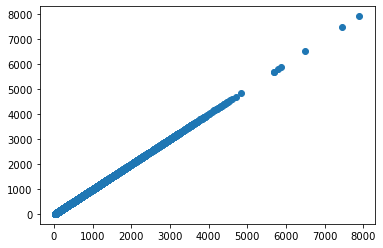

In [36]:
plt.scatter(second_segment["od_scan_time"],second_segment["start_scan_to_end_scan"])

We see a linear relationship between these two features. We can say that there is no significant difference between these two features.

However we can confirm this by performing hypothesis testing

In [37]:
tstat,pval = ttest_ind(second_segment["actual_time"],second_segment["segment_actual_time_agg_value"])
alpha = 0.05
print("Tstat: ",tstat)
print("Pvalue: ",pval)
if pval<alpha:
    print("Reject Null Hypothesis")
    print(Ha)
else:
    print("Failed to reject Null Hypothesis")
    print("There is no significant dirrerence between these two features")

Tstat:  0.41558384261213344
Pvalue:  0.6777175672101208
Failed to reject Null Hypothesis
There is no significant dirrerence between these two features


Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value

In [38]:
second_segment[["actual_time_agg_value","osrm_time_agg_value"]]

,actual_time_agg_value,osrm_time_agg_value
0,9198.0,4323.0
1,303.0,155.0
2,109624.0,64341.0
3,82.0,24.0
4,97.0,48.0
...,...,...
14782,70.0,51.0
14783,33.0,19.0
14784,292.0,61.0
14785,51.0,22.0


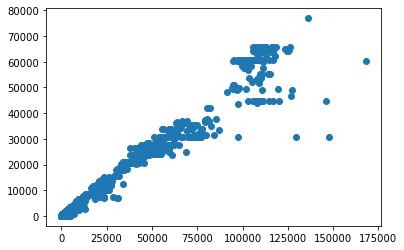

In [39]:
plt.scatter(second_segment["actual_time_agg_value"],second_segment["osrm_time_agg_value"])

In [40]:
# plt.hist(second_segment["actual_time_agg_value"].sample(100))

In [41]:
sample1=[]
for i in range(100):
    sample1.append(second_segment["actual_time_agg_value"].sample(100).mean())


<AxesSubplot:ylabel='Count'>

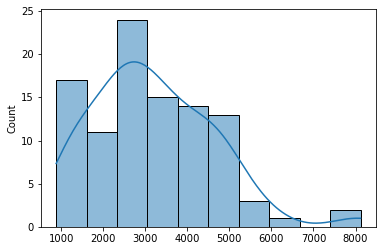

In [42]:
sns.histplot(sample1,bins=10,kde = True)

In [43]:
n = np.log(sample1)

<AxesSubplot:ylabel='Count'>

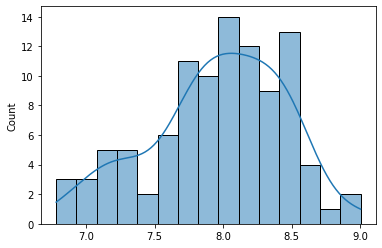

In [44]:
sns.histplot(n,bins=15,kde=True)

In [45]:
sample2=[]
for i in range(100):
    sample2.append(second_segment["osrm_time_agg_value"].sample(100).mean())


<AxesSubplot:ylabel='Count'>

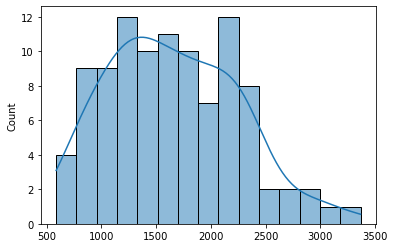

In [46]:
sns.histplot(sample2,bins=15,kde=True)

In [47]:
y = np.log(sample2)

<AxesSubplot:ylabel='Count'>

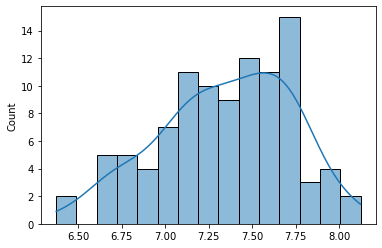

In [48]:
sns.histplot(y,bins=15,kde=True)

<AxesSubplot:>

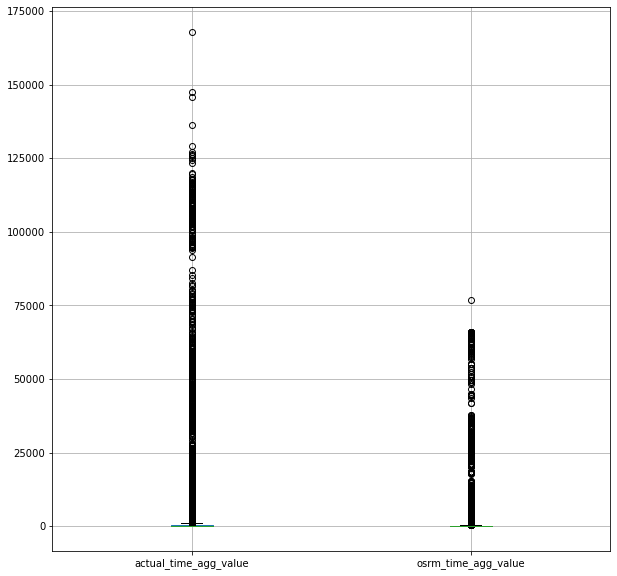

In [49]:
plot1 = second_segment[["actual_time_agg_value","osrm_time_agg_value"]]

plot1.boxplot(figsize=(10,10))

In [50]:
plot1 = pd.DataFrame([second_segment["actual_time_agg_value"].mean(),second_segment["osrm_time_agg_value"].mean()],index=["Actual_time_mean","OSRM_time_mean"]).reset_index()

In [51]:
plot1.rename(columns={'index':"time",0:'values'},inplace=True)

<AxesSubplot:xlabel='time', ylabel='values'>

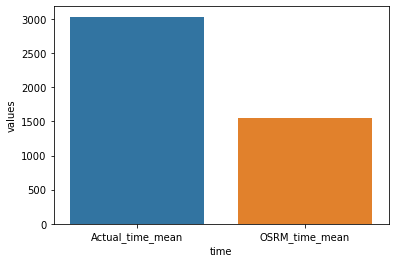

In [52]:
sns.barplot(x=plot1["time"],y=plot1["values"])

### Performing Paired T Test 

#### H0: There is no significant difference between Actual time aggrigated value and Osrm time aggrigated value
#### Ha: There is significant difference between Actual time aggrigated value and Osrm time aggrigated value

In [53]:
H0= "There is no significant difference between Actual time aggrigated value and Osrm time aggrigated value"
Ha= "There is significant difference between Actual time aggrigated value and Osrm time aggrigated value"
alpha = 0.05 #significance

In [54]:
tstat,pval = ttest_rel(second_segment["actual_time_agg_value"],second_segment["osrm_time_agg_value"])

print("Tstat: ",tstat)
print("Pvalue: ",pval)
if pval<alpha:
    print("Reject Null Hypothesis")
    print(Ha)
else:
    print("Failed to reject Null Hypothesis")
    print(H0)

Tstat:  27.157693412296922
Pvalue:  1.5469326862165807e-158
Reject Null Hypothesis
There is significant difference between Actual time aggrigated value and Osrm time aggrigated value


## actual_time aggregated value and segment actual time aggregated value 

In [55]:
plot2=second_segment[["actual_time","segment_actual_time_agg_value"]]

<AxesSubplot:>

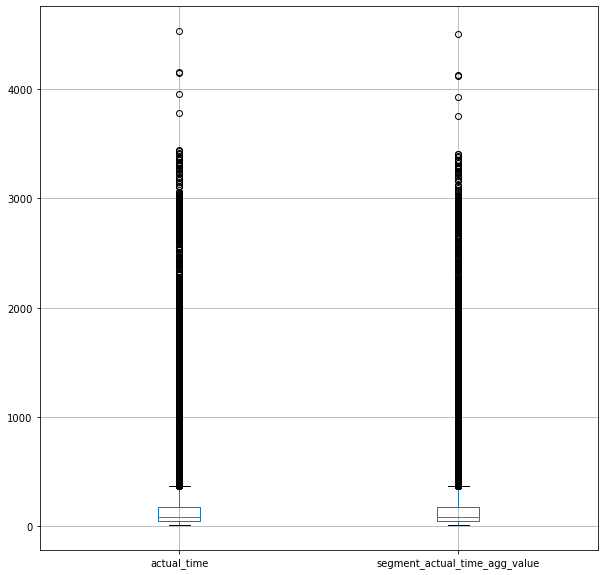

In [56]:
plot2.boxplot(figsize=(10,10))

In [57]:
plot2 = pd.DataFrame([second_segment["actual_time"].mean(),second_segment["segment_actual_time_agg_value"].mean()],index=["Actual_time_mean","Segment_Actual_time"]).reset_index()

In [58]:
plot2.rename(columns={'index':"time",0:'values'},inplace=True)

<AxesSubplot:xlabel='time', ylabel='values'>

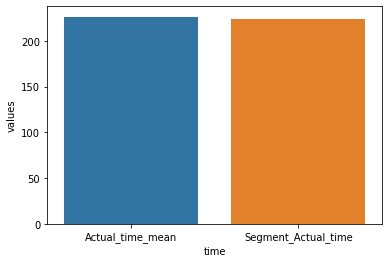

In [59]:
sns.barplot(x=plot2["time"],y=plot2["values"])

### Performing T Test 

#### H0: There is no significant difference between Actual time aggrigated value and Segment actual time 
#### Ha: There is significant difference between Actual time aggrigated value and Segment actual time

In [60]:
H0= "There is no significant difference between Actual time aggrigated value and Segment actual time"
Ha= "There is significant difference between Actual time aggrigated value and Segment actual time"
alpha = 0.05 #significance

In [61]:
tstat,pval = ttest_ind(second_segment["actual_time"],second_segment["segment_actual_time_agg_value"])

print("Tstat: ",tstat)
print("Pvalue: ",pval)
if pval<alpha:
    print("Reject Null Hypothesis")
    print(Ha)
else:
    print("Failed to reject Null Hypothesis")
    print(H0)

Tstat:  0.41558384261213344
Pvalue:  0.6777175672101208
Failed to reject Null Hypothesis
There is no significant difference between Actual time aggrigated value and Segment actual time


## osrm distance aggregated value and segment osrm distance aggregated value

In [62]:
second_segment[["osrm_distance","segment_osrm_distance_agg_value"]]

,osrm_distance,segment_osrm_distance_agg_value
0,544.8027,649.8528
1,56.9116,55.9899
2,2072.8556,2227.5270
3,19.6800,19.8766
4,29.5696,29.5697
...,...,...
14782,28.8991,28.8991
14783,16.0882,16.0883
14784,30.0545,35.4369
14785,16.0185,16.0184


In [63]:
# second_segment[second_segment["trip_uuid"]=="trip-153741093647649320"][['trip_uuid',"osrm_distance","segment_osrm_distance_agg_value"]]

In [64]:
# df[df["trip_uuid"]=="trip-153741093647649320"][['trip_uuid',"osrm_distance","segment_osrm_distance"]]

In [65]:
plot3=second_segment[["osrm_distance","segment_osrm_distance_agg_value"]]

<AxesSubplot:>

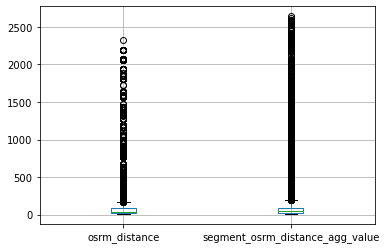

In [66]:
plot3.boxplot()

In [67]:
plot3 = pd.DataFrame([second_segment["osrm_distance"].mean(),second_segment["segment_osrm_distance_agg_value"].mean()],index=["Osrm_distance","Segment_Osrm_distance"]).reset_index()

In [68]:
plot3.rename(columns={'index':"time",0:'values'},inplace=True)

<AxesSubplot:xlabel='time', ylabel='values'>

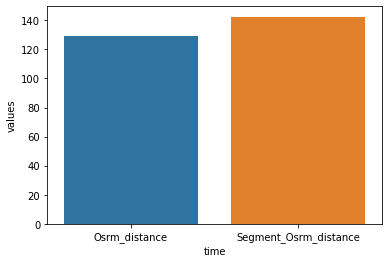

In [69]:
sns.barplot(x=plot3["time"],y=plot3["values"])

### Performing T Test 

#### H0: There is no significant difference between Osrm distance and Segment segment osrm distance 
#### Ha: There is significant difference between Osrm distance value and segment osrm distance

In [70]:
H0= "There is no significant difference between Osrm distance and Segment segment osrm distance"
Ha= "There is significant difference between Osrm distance value and segment osrm distance"
alpha = 0.05 #significance

In [71]:
tstat,pval = ttest_ind(second_segment["osrm_distance"],second_segment["segment_osrm_distance_agg_value"],alternative="less")

print("Tstat: ",tstat)
print("Pvalue: ",pval)
if pval<alpha:
    print("Reject Null Hypothesis")
    print(Ha)
else:
    print("Failed to reject Null Hypothesis")
    print(H0)

Tstat:  -3.5706465151932707
Pvalue:  0.00017833289435327187
Reject Null Hypothesis
There is significant difference between Osrm distance value and segment osrm distance


## osrm time aggregated value and segment osrm time aggregated value 

In [72]:
second_segment[["osrm_time","segment_osrm_time_agg_value"]]

,osrm_time,segment_osrm_time_agg_value
0,388.0,474.0
1,42.0,39.0
2,1528.0,1710.0
3,15.0,16.0
4,27.0,26.0
...,...,...
14782,28.0,28.0
14783,12.0,11.0
14784,24.0,36.0
14785,14.0,14.0


In [73]:
plot4=second_segment[["osrm_time","segment_osrm_time_agg_value"]]

<AxesSubplot:>

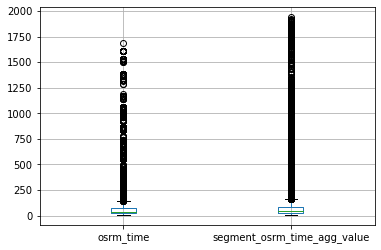

In [74]:
plot4.boxplot()

In [75]:
plot4 = pd.DataFrame([second_segment["osrm_time"].mean(),second_segment["segment_osrm_time_agg_value"].mean()],index=["Osrm_time","Segment_Osrm_time"]).reset_index()

In [76]:
plot4.rename(columns={'index':"time",0:'values'},inplace=True)

<AxesSubplot:xlabel='time', ylabel='values'>

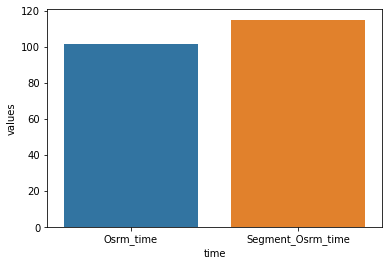

In [77]:
sns.barplot(x=plot4["time"],y=plot4["values"])

### Performing T Test 

#### H0: There is no significant difference between Osrm time and Segment osrm time 
#### Ha: There is significant difference between Osrm time value and segment osrm time

In [78]:
H0= "There is no significant difference between Osrm time and Segment segment osrm time"
Ha= "There is significant difference between Osrm time value and segment osrm time"
alpha = 0.05 #significance

In [79]:
tstat,pval = ttest_ind(second_segment["osrm_distance"],second_segment["segment_osrm_distance_agg_value"],alternative="less")

print("Tstat: ",tstat)
print("Pvalue: ",pval)
if pval<alpha:
    print("Reject Null Hypothesis")
    print(Ha)
else:
    print("Failed to reject Null Hypothesis")
    print(H0)

Tstat:  -3.5706465151932707
Pvalue:  0.00017833289435327187
Reject Null Hypothesis
There is significant difference between Osrm time value and segment osrm time


outliers in the numerical variables

In [80]:
second_segment.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'start_scan_to_end_scan', 'od_scan_time',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'actual_time_agg_value', 'osrm_time_agg_value',
       'segment_actual_time_agg_value', 'osrm_distance_agg_value',
       'segment_osrm_distance_agg_value', 'segment_osrm_time_agg_value',
       'trip_creation_year', 'trip_creation_month', 'trip_creation_week',
       'trip_creation_day', 'trip_creation_hour'],
      dtype='object')

In [81]:
cols = ['trip_creation_time','start_scan_to_end_scan', 'od_scan_time',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'actual_time_agg_value', 'osrm_time_agg_value',
       'segment_actual_time_agg_value', 'osrm_distance_agg_value',
       'segment_osrm_distance_agg_value', 'segment_osrm_time_agg_value']

<AxesSubplot:>

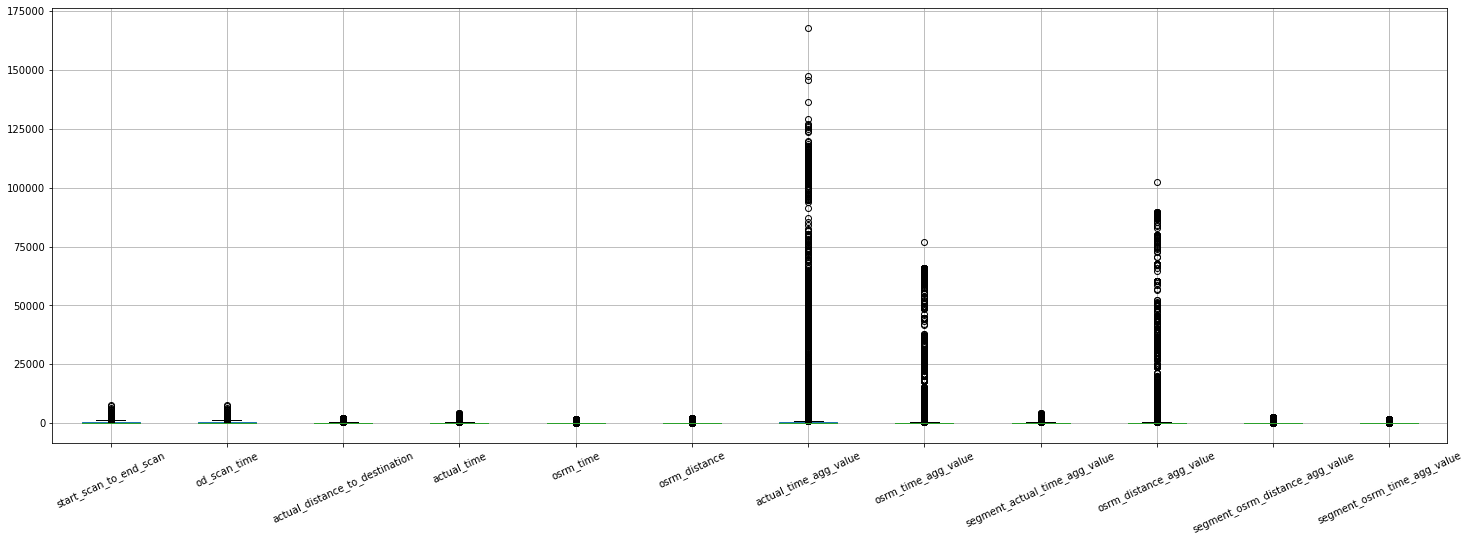

In [82]:
second_segment[cols].boxplot(rot=25, figsize=(25,8))

In [83]:
q1 = second_segment[cols].quantile(0.25)
q3 = second_segment[cols].quantile(0.75)

iqr = q3 - q1

In [84]:
iqr

start_scan_to_end_scan             483.000000
od_scan_time                       483.839201
actual_distance_to_destination     140.814159
actual_time                        128.000000
osrm_time                           49.000000
osrm_distance                       59.207750
actual_time_agg_value              400.000000
osrm_time_agg_value                190.000000
segment_actual_time_agg_value      127.000000
osrm_distance_agg_value            212.461150
segment_osrm_distance_agg_value     65.621350
segment_osrm_time_agg_value         56.000000
dtype: float64

In [85]:
second_segment = second_segment[-((second_segment[cols[1:]] < (q1 - 1.5 * iqr)) | (second_segment[cols[1:]] > (q3 + 1.5 * iqr))).any(axis=1)]
second_segment = second_segment.reset_index(drop=True) 

<AxesSubplot:>

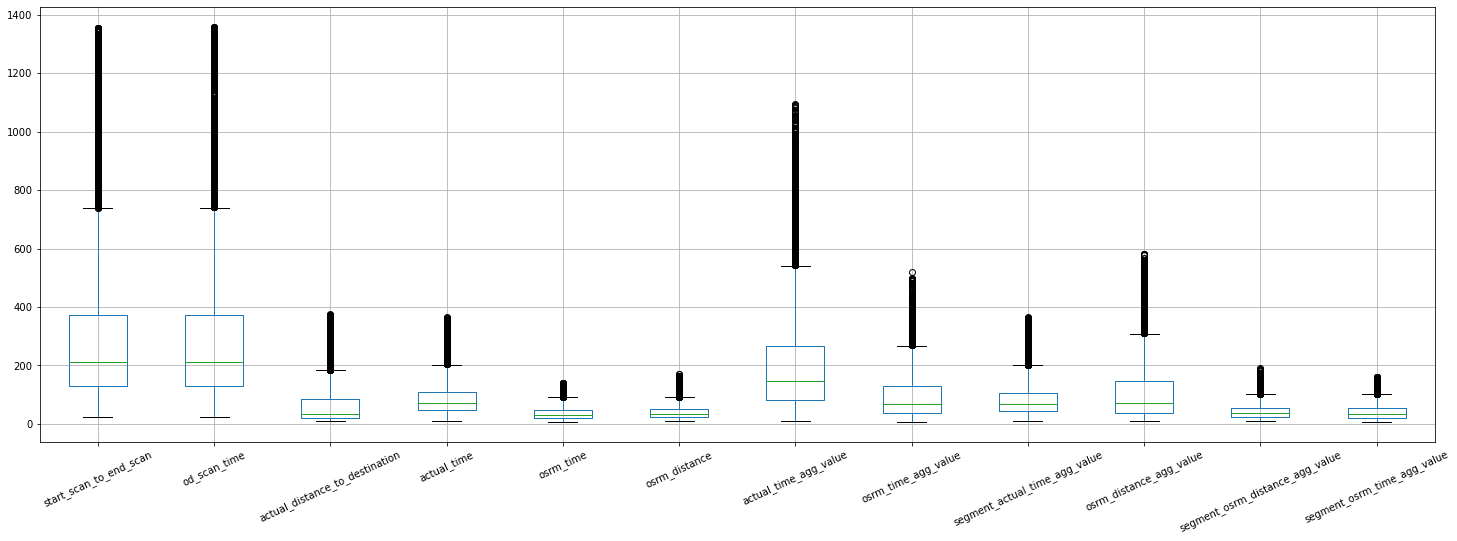

In [86]:
second_segment[cols].boxplot(rot=25, figsize=(25,8))

Do one-hot encoding of categorical variables 

In [87]:
second_segment["route_type"]

0        Carting
1        Carting
2            FTL
3        Carting
4        Carting
          ...   
11580    Carting
11581    Carting
11582    Carting
11583    Carting
11584        FTL
Name: route_type, Length: 11585, dtype: object

In [88]:
def func(x):
    if x == "FTL":
        return 0
    return 1

In [89]:
second_segment["route_type"] = second_segment["route_type"].apply(lambda x: func(x))

In [90]:
second_segment["route_type"]

0        1
1        1
2        0
3        1
4        1
        ..
11580    1
11581    1
11582    1
11583    1
11584    0
Name: route_type, Length: 11585, dtype: int64

In [91]:
second_segment["data"].unique()

array(['training', 'test'], dtype=object)

In [92]:
second_segment["data"] = second_segment["data"].map({"training":0,"test":1})

### Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.


In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
second_segment_copy = second_segment.copy()
stdscr = StandardScaler()
stdscr.fit(second_segment_copy[cols[1:]])

StandardScaler()

In [95]:
second_segment

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,osrm_time_agg_value,segment_actual_time_agg_value,osrm_distance_agg_value,segment_osrm_distance_agg_value,segment_osrm_time_agg_value,trip_creation_year,trip_creation_month,trip_creation_week,trip_creation_day,trip_creation_hour
0,0,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,1,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,...,155.0,95.0,209.1151,55.9899,39.0,2018,9,37,12,0
1,0,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,1,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,...,24.0,59.0,31.6475,19.8766,16.0,2018,9,37,12,0
2,0,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,0,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,...,48.0,63.0,53.1588,29.5697,26.0,2018,9,37,12,0
3,0,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,1,trip-153671055416136166,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),189.0,...,19.0,39.0,26.3531,16.2225,12.0,2018,9,37,12,0
4,0,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,1,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),98.0,...,13.0,24.0,12.0184,12.0184,13.0,2018,9,37,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11580,1,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,1,trip-153861095625827784,IND160102AAD,Chandigarh_Raiprkln_C (Chandigarh),IND140603AAA,Zirakpur_DC (Punjab),257.0,...,51.0,33.0,58.2599,28.8991,28.0,2018,10,40,3,23
11581,1,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,1,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,...,19.0,21.0,26.5333,16.0883,11.0,2018,10,40,3,23
11582,1,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,1,trip-153861106442901555,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),421.0,...,61.0,190.0,74.2798,35.4369,36.0,2018,10,40,3,23
11583,1,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,1,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,...,22.0,29.0,25.5371,16.0184,14.0,2018,10,40,3,23


In [96]:
second_segment_copy[cols[1:]] = stdscr.transform(second_segment_copy[cols[1:]]) 

In [97]:
second_segment_copy[cols[1:]]

,start_scan_to_end_scan,od_scan_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,actual_time_agg_value,osrm_time_agg_value,segment_actual_time_agg_value,osrm_distance_agg_value,segment_osrm_distance_agg_value,segment_osrm_time_agg_value
0,-0.472130,-0.468550,0.126545,0.175275,0.203215,0.543182,0.551487,0.671043,0.173310,0.989354,0.379181,-0.053291
1,-0.781336,-0.781592,-0.696548,-0.476793,-1.003473,-0.813626,-0.697144,-0.879558,-0.464362,-0.785176,-0.836494,-0.944335
2,1.603415,1.602795,0.923921,-0.406299,-0.467167,-0.453225,-0.612395,-0.595478,-0.393509,-0.570080,-0.510197,-0.556925
3,-0.437344,-0.434297,-0.587485,-0.811638,-1.137550,-0.939625,-0.759293,-0.938741,-0.818624,-0.838115,-0.959501,-1.099299
4,-0.789066,-0.791199,-0.815207,-1.093614,-1.092857,-1.092832,-1.024839,-1.009761,-1.084320,-0.981451,-1.101023,-1.060558
...,...,...,...,...,...,...,...,...,...,...,...,...
11580,-0.174519,-0.173646,-0.100120,-0.917379,-0.422475,-0.477660,-0.764943,-0.559968,-0.924902,-0.519074,-0.532771,-0.479443
11581,-0.935939,-0.935589,-0.720963,-1.146484,-1.137550,-0.944519,-0.973990,-0.938741,-1.137460,-0.836314,-0.964018,-1.138040
11582,0.459353,0.459604,-0.380464,1.831879,-0.601244,-0.435554,0.489337,-0.441602,1.856055,-0.358888,-0.312691,-0.169514
11583,0.173337,0.175544,1.030832,-0.987873,-1.048165,-0.947059,-0.872291,-0.903231,-0.995755,-0.846275,-0.966371,-1.021817


## where most orders are coming from

### State with most orders

In [98]:
def statefilter(x):
    text = x.split(" (")[1]
    return text[:-1]

In [99]:
second_segment["destination_state"] = second_segment["destination_name"].apply(lambda x:statefilter(x))

In [100]:
second_segment["source_state"] = second_segment["source_name"].apply(lambda x:statefilter(x))

In [101]:
second_segment["source_state"].value_counts()

Maharashtra               2218
Karnataka                 2016
Tamil Nadu                1018
Haryana                    987
Telangana                  642
Delhi                      601
Gujarat                    583
Uttar Pradesh              571
West Bengal                531
Punjab                     355
Rajasthan                  346
Andhra Pradesh             344
Bihar                      263
Kerala                     244
Madhya Pradesh             200
Assam                      175
Jharkhand                   92
Chandigarh                  89
Uttarakhand                 86
Orissa                      69
Himachal Pradesh            37
Goa                         35
Chhattisgarh                31
Dadra and Nagar Haveli      15
Jammu & Kashmir             14
Arunachal Pradesh           10
Pondicherry                  8
Nagaland                     3
Meghalaya                    2
Name: source_state, dtype: int64

In [102]:
second_segment["destination_state"].value_counts()

Maharashtra               2207
Karnataka                 2005
Tamil Nadu                1024
Haryana                   1003
Telangana                  651
Uttar Pradesh              578
Gujarat                    571
Delhi                      532
West Bengal                531
Punjab                     402
Rajasthan                  355
Andhra Pradesh             345
Bihar                      263
Kerala                     246
Madhya Pradesh             224
Assam                      159
Uttarakhand                 92
Jharkhand                   92
Orissa                      69
Chandigarh                  57
Himachal Pradesh            49
Goa                         32
Chhattisgarh                31
Arunachal Pradesh           20
Dadra and Nagar Haveli      17
Jammu & Kashmir             15
Meghalaya                    8
Pondicherry                  3
Mizoram                      2
Daman & Diu                  1
Tripura                      1
Name: destination_state, dtype: int64

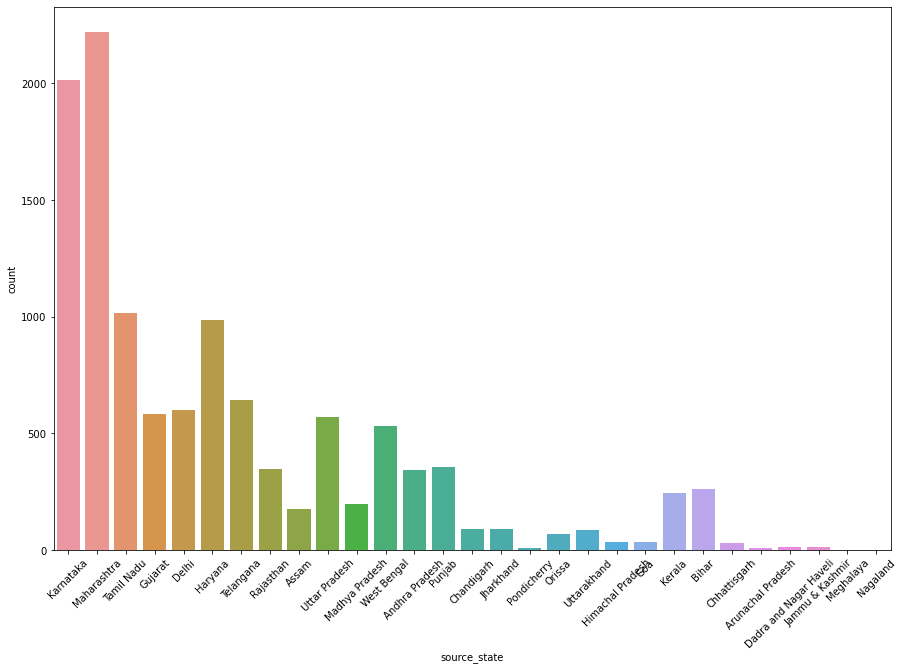

In [103]:
plt.figure(figsize=(15,10))
sns.countplot(data =  second_segment,x=second_segment["source_state"])
plt.xticks(rotation=45)
plt.show()

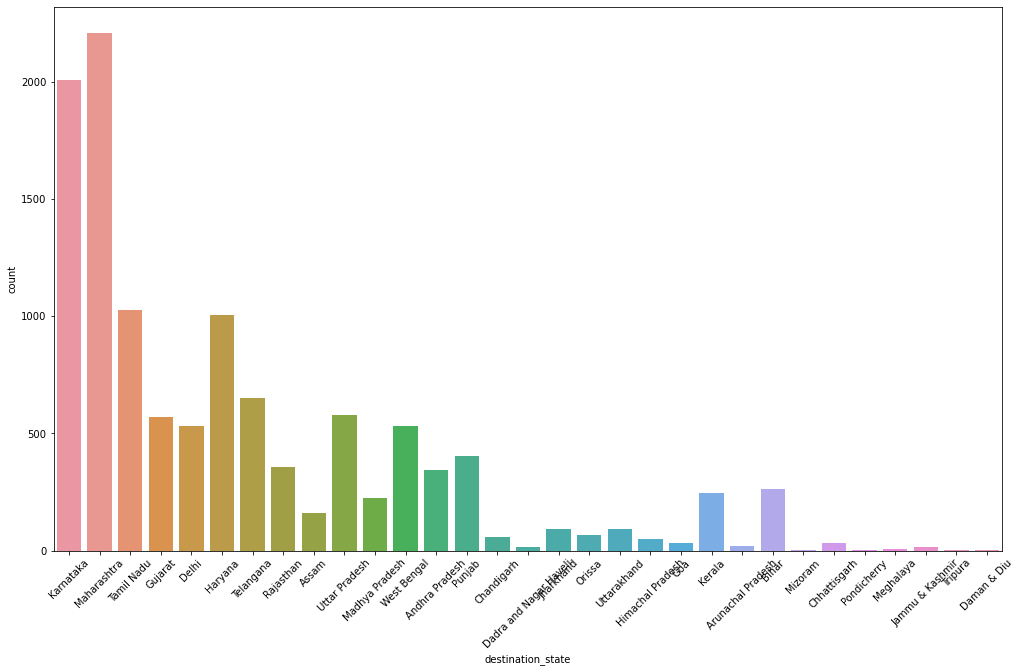

In [104]:
plt.figure(figsize=(17,10))
sns.countplot(data =  second_segment,x=second_segment["destination_state"])
plt.xticks(rotation=45)
plt.show()

In [105]:
indian_state_regions = {
    "Andhra Pradesh": "South",
    "Arunachal Pradesh": "Northeast",
    "Assam": "Northeast",
    "Bihar": "East",
    "Chhattisgarh": "Central",
    "Goa": "West",
    "Gujarat": "West",
    "Haryana": "North",
    "Himachal Pradesh": "North",
    "Jharkhand": "East",
    "Karnataka": "South",
    "Kerala": "South",
    "Madhya Pradesh": "Central",
    "Maharashtra": "West",
    "Manipur": "Northeast",
    "Meghalaya": "Northeast",
    "Mizoram": "Northeast",
    "Nagaland": "Northeast",
    "Odisha": "East",
    "Punjab": "North",
    "Rajasthan": "North",
    "Sikkim": "Northeast",
    "Tamil Nadu": "South",
    "Telangana": "South",
    "Tripura": "Northeast",
    "Uttar Pradesh": "North",
    "Uttarakhand": "North",
    "West Bengal": "East",
    "Jammu and Kashmir": "North",
    "Ladakh": "North",
    "Delhi": "North",
    "Puducherry": "South",
    "Chandigarh": "North",
    "Lakshadweep": "South",
    "Daman and Diu": "West",
    "Dadra and Nagar Haveli": "West",
}




In [106]:
second_segment["region"] = second_segment["source_state"].map(indian_state_regions)

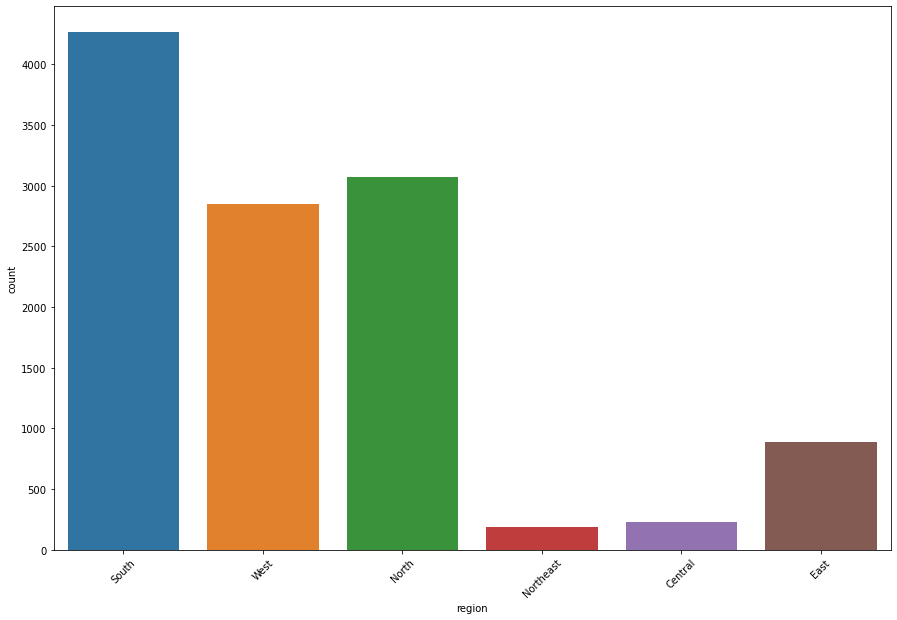

In [107]:
plt.figure(figsize=(15,10))
sns.countplot(data =  second_segment,x=second_segment["region"])
plt.xticks(rotation=45)
plt.show()



## Insights

- There is a significant difference between OSRM and actual parameters.
- South, West and North corridors have significantly higher number of orders. We have very less orders from Northeast, central and east regions.
- Good number of orders are form Maharashtra followed by karnataka. The next in line are Tamil Nadu and Haryana.

## Recommendations

- There is a significat difference between OSRM and actual parameters. Hence company must revisit on what data they are feeding to Open Source Routing Machine.
- Also check if the routing machine, update/configured to consider all kinds of situatons.
- Company can leverage local knowledge and expertise to identify routes that are known to be faster or more efficient than what the routing engine suggests.